# IPL Analysis and Visualisations

In [15]:
#importing the required libraries

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing & loading CSV files.
import matplotlib.pyplot as mlt
import seaborn as sns


In [17]:
matches=pd.read_csv("C:\\Users\\DM\\Downloads\\matches.csv")   
delivery=pd.read_csv("C:\\Users\\DM\\Downloads\\deliveries.csv.zip")
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN


In [18]:
delivery.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Some Cleaning And Transformation

In [19]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [20]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

Some Basic Analysis

In [21]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 577
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']
 
 Teams : ['KKR' 'CSK' 'RR' 'MI' 'DC' 'KXIP' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']


In [22]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  43


In [23]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


Toss Decisions

In [26]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    54.592721
bat      45.407279
Name: toss_decision, dtype: float64


Toss Decisions across Seasons

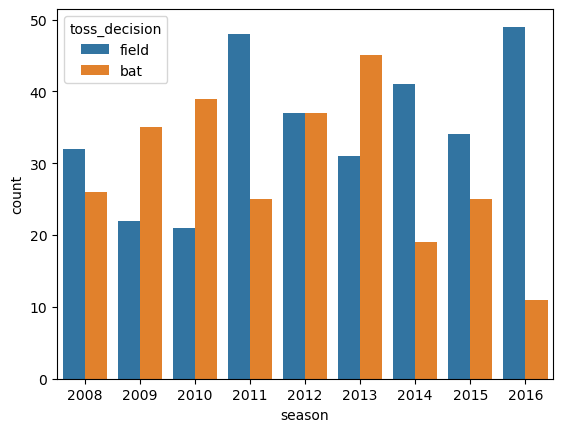

In [28]:
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting.





Maximum Toss Winners

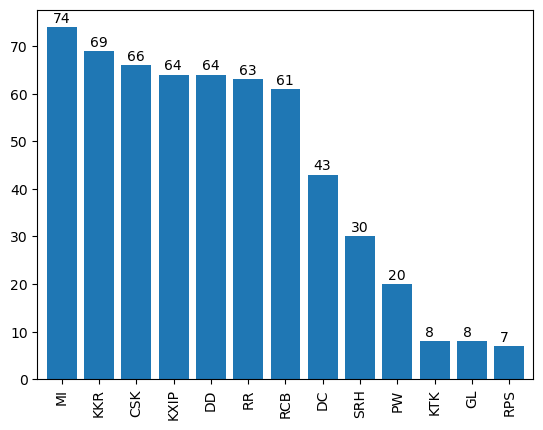

In [29]:
ax=matches['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven




Chances Of Winning The Toss

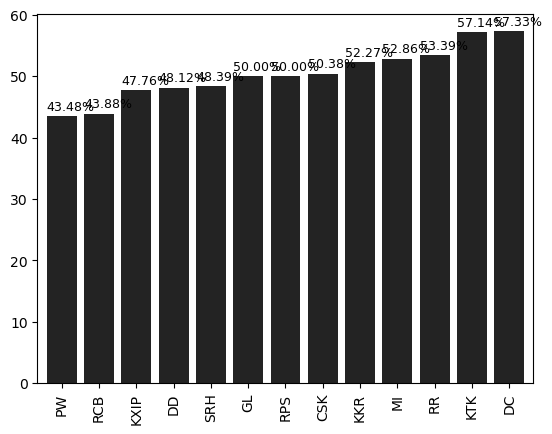

In [31]:
w=matches['toss_winner'].value_counts()
m=pd.concat([matches['team1'],matches['team2']]).value_counts()
ax=(w/m*100).sort_values().plot.bar(width=0.8,color='#232323')
for p in ax.patches:                       #used to display the values on the top of the bar
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x(), p.get_height()+1),fontsize=9)
mlt.show()

Now we can see that the chance for winning a toss is highset for DC and it is lowest for PW

Is Toss Winner Also the Match Winner?

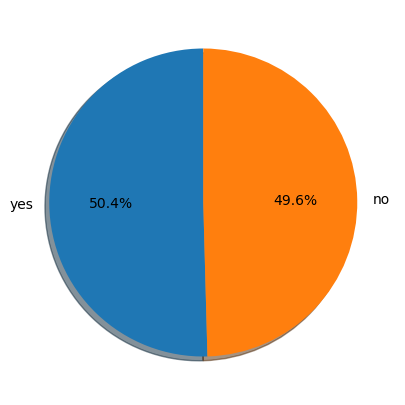

In [32]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winnong team is about 50%-50%

Matches played across each seaon

<AxesSubplot:xlabel='season', ylabel='count'>

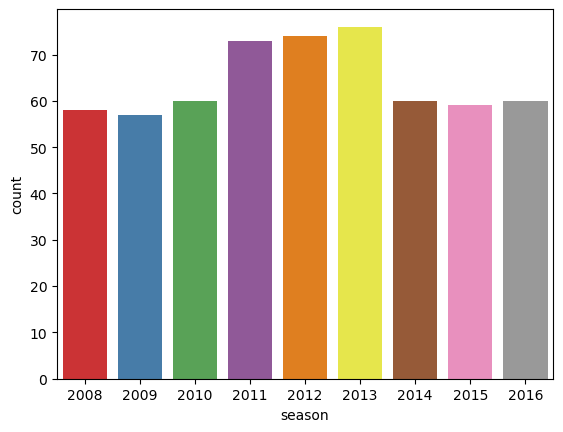

In [35]:
sns.countplot(x='season',data=matches,palette="Set1")  #countplot automatically counts the frequency of an item


Runs Across the Seasons

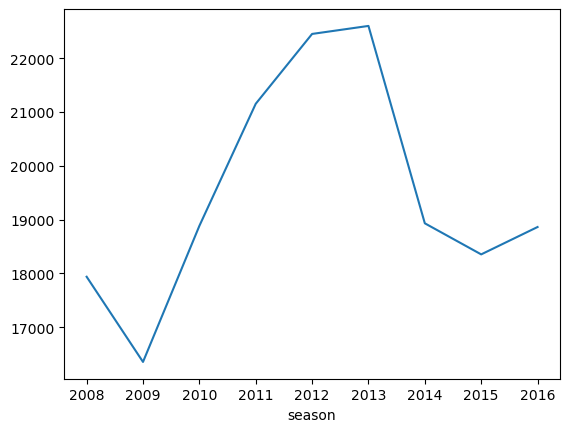

In [37]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum()
season.plot()
mlt.show()

There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs.

Favorite Grounds

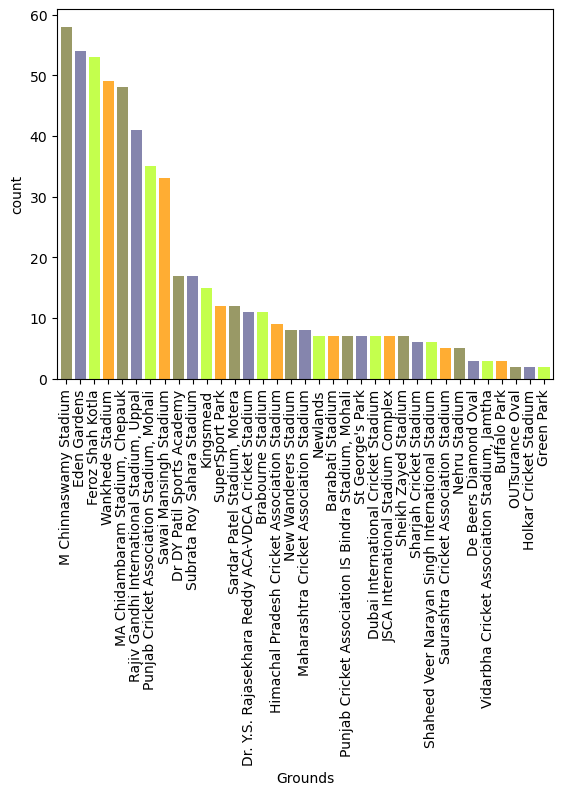

In [38]:
ax = matches['venue'].value_counts().plot.bar(width=.8, color=["#999966", "#8585ad", "#c4ff4d", "#ffad33"])
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

Maximum Man Of Matches

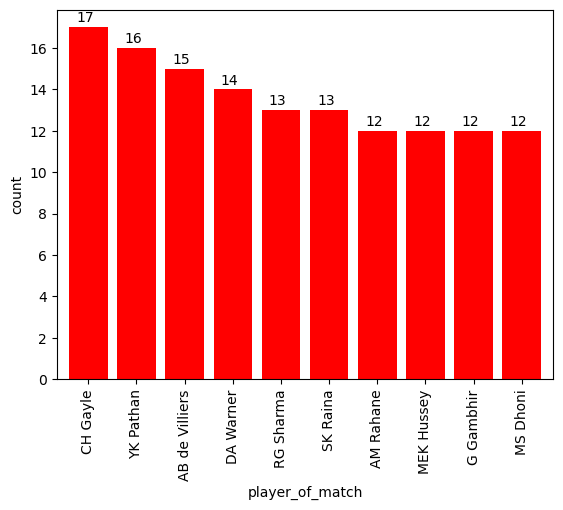

In [41]:
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color='Red')  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

Winners by Year

In [44]:
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]])
#getting the last match in every season since the last match will be the final match for the season

season    2008
winner      RR
Name: 57, dtype: object
season    2009
winner      DC
Name: 114, dtype: object
season    2010
winner     CSK
Name: 174, dtype: object
season    2011
winner     CSK
Name: 247, dtype: object
season    2012
winner     KKR
Name: 321, dtype: object
season    2013
winner      MI
Name: 397, dtype: object
season    2014
winner     KKR
Name: 457, dtype: object
season    2015
winner      MI
Name: 516, dtype: object
season    2016
winner     SRH
Name: 576, dtype: object


Super Over!

In [45]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 6


In [46]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['KTK', 'DC', 'RPS', 'GL', 'MI', 'PW']


Matches won by each team

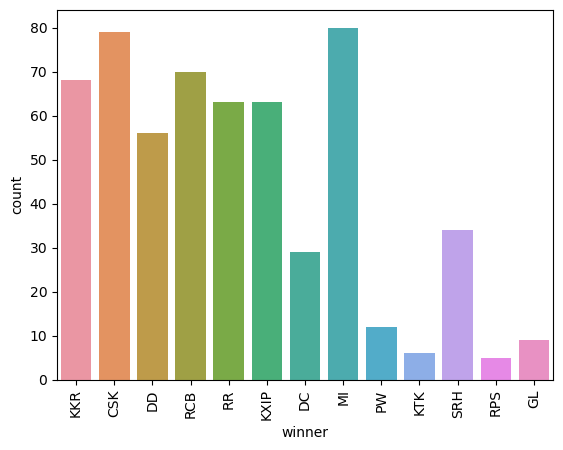

In [47]:
sns.countplot(x='winner', data=matches)
mlt.xticks(rotation='vertical')
mlt.show()

Favorite Umpires

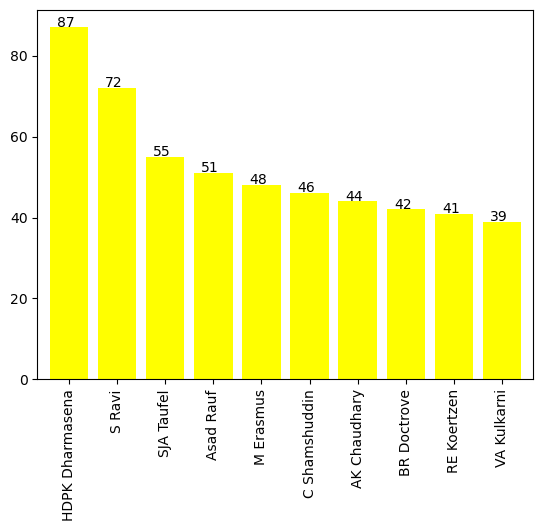

In [49]:
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color='Yellow')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

Team1 vs Team2

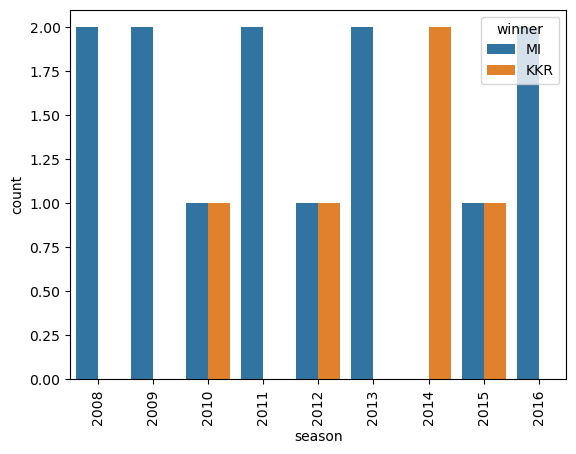

In [50]:
mt1=matches[((matches['team1']=='MI')|(matches['team2']=='MI'))&((matches['team1']=='KKR')|(matches['team2']=='KKR'))]
sns.countplot(x='season', hue='winner', data=mt1)
mlt.xticks(rotation='vertical')
mlt.show()

MI have defeated KKR in 13 out of 18 matches played between them.Only in the year 2014, KKR won both the matches.Thus in a MI vs KKR match, we know on whom should we bet upon. Similar comparisions can be done between any two teams, we just need to change the team names.

One thing to notice is that MI and KKR have never played against each other in any qualifiers or finals as both of them have played only 2 matches every year, those being the group stage matches

MI vs CSK

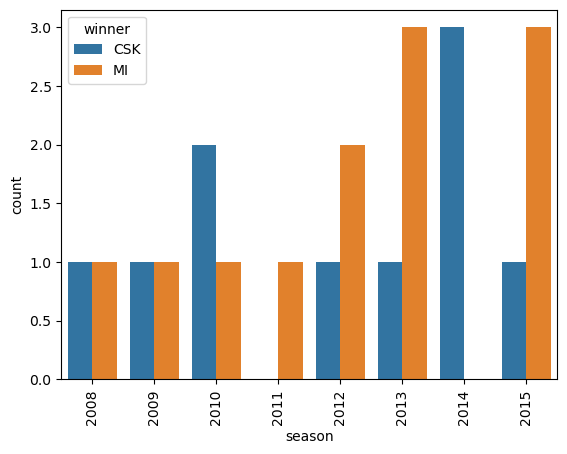

In [51]:
mt2=matches[((matches['team1']=='MI')|(matches['team2']=='MI'))&((matches['team1']=='CSK')|(matches['team2']=='CSK'))]
sns.countplot(x='season', hue='winner', data=mt2)
mlt.xticks(rotation='vertical')
mlt.show()

Here se can see that MI and CSK have played against each other in more than 2 matches in some seasons i.e they have played qualifiers too.

200+ Scores

In [52]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores.nlargest(10,'total_runs')
#nlargest is used to sort the given column

,match_id,inning,batting_team,bowling_team,total_runs
709,352,1,RCB,PW,263
1130,561,1,RCB,GL,248
296,147,1,CSK,RR,246
2,2,1,CSK,KXIP,240
1014,503,1,RCB,MI,235
476,237,1,KXIP,RCB,232
402,200,1,DD,KXIP,231
861,427,1,KXIP,CSK,231
1050,521,1,RCB,SRH,227
921,457,1,KXIP,CSK,226


Highest team scores in all seasons

In [53]:
high=delivery.groupby(['match_id', 'inning','batting_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>200].groupby(['inning','batting_team']).count()
high.T  #transpose

inning         1                                2               
batting_team CSK DC DD KKR KXIP MI RCB RR SRH CSK KXIP MI RCB RR
count          8  1  2   2    5  6   9  3   3   3    5  1   1  3

RCB leads the list with highest number of 200+ scores, maybe due to the Gayle,Kohli,De-Villiers factor.The number of 200+ scores is high in innings 1. This is an indication that if a team scores 200+ in 1st innings, chances of winning is high for them, as in innings 2 very few teams have 200+ score and they may or maynot chase down the target score.

In [54]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head(5)

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,KKR,RCB,222,2,82,no
1,2,1,CSK,KXIP,240,2,207,no
7,8,1,CSK,MI,208,2,202,no
8,9,1,DC,RR,214,2,217,yes
32,33,1,KKR,DC,204,2,181,no


Chances of chasing 200+ target

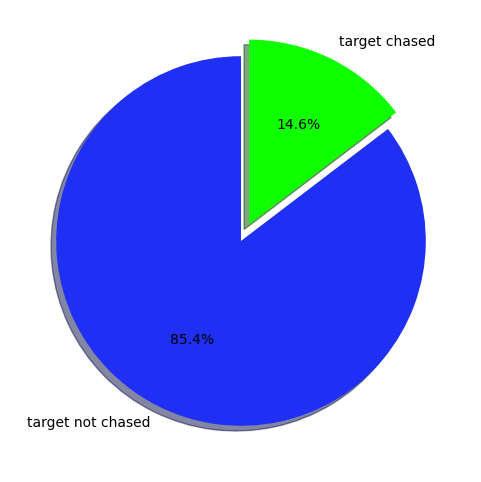

In [55]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

It seems to be clear that team batting first and scoring 200+ runs, has a very high probablity of winning the match

Top Batsmen

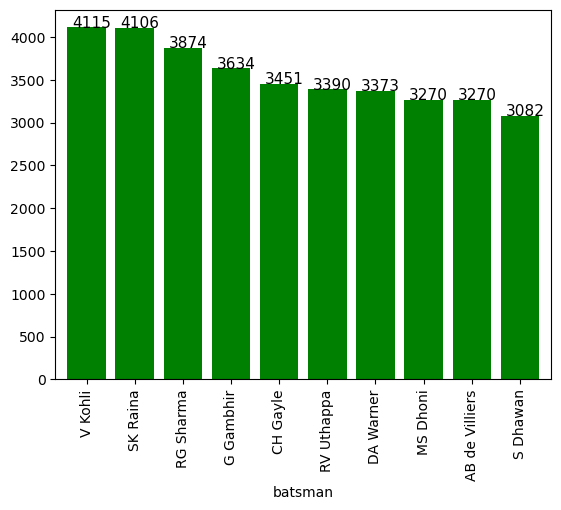

In [56]:
#Top 10 Batsman

max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color='Green')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=11)
mlt.show()

Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot

Maximum Sixes

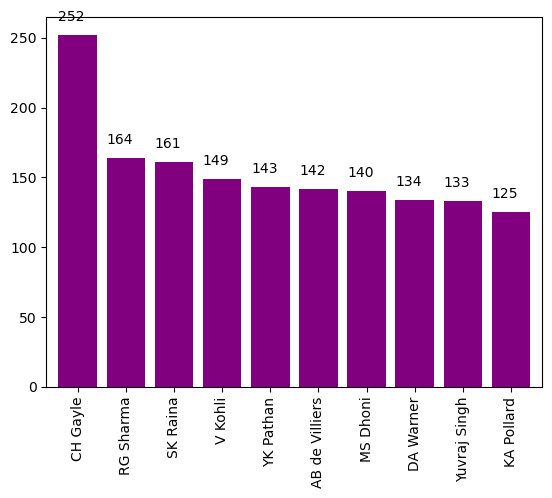

In [57]:
ax=delivery[delivery['batsman_runs']==6].batsman.value_counts()[:10].plot.bar(width=0.8,color='Purple')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
mlt.show()

Chris Gayle, the Big Jamaican leads here by a huge margin followed by Rohit Sharma

Top Individual Scores

In [58]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)

,match_id,batsman,batting_team,batsman_runs
5302,352,CH Gayle,RCB,175
2,1,BB McCullum,KKR,158
7528,503,AB de Villiers,RCB,133
8359,561,AB de Villiers,RCB,129
4687,313,CH Gayle,RCB,128
2237,147,M Vijay,CSK,127
6854,457,V Sehwag,KXIP,122
2788,184,PC Valthaty,KXIP,120
3325,220,V Sehwag,DD,119
7460,498,CH Gayle,RCB,117


Here too the Jamaican leads the table. Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

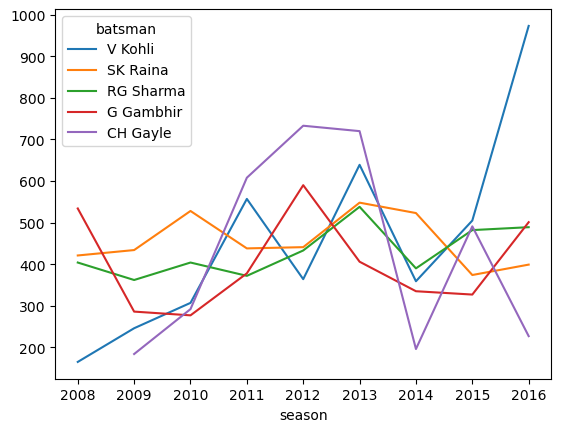

In [59]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot()
mlt.show()

Virat Kohli's form looks to be improving season by season and it went up very high in the last season. Gayle's form improved in seasons 3-4 but it went down in further seasons. Thus Gayle's form is pretty unpredictable in a season. Other batsman's form looks to slump a bit but recovers in further season

How do the top batsmen score?

In [61]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c

,type,count
batsman,,
V Kohli,1,1303
V Kohli,2,222
V Kohli,4,361
V Kohli,6,149
SK Raina,1,1227
SK Raina,2,219
SK Raina,4,360
SK Raina,6,161
RG Sharma,1,1261


Frequency of Scores

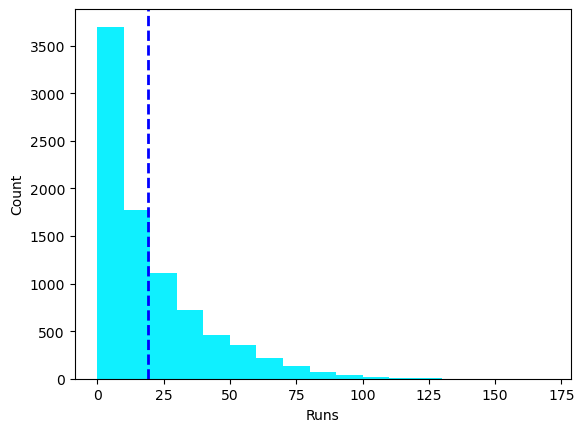

In [62]:
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low

Top Bowlers

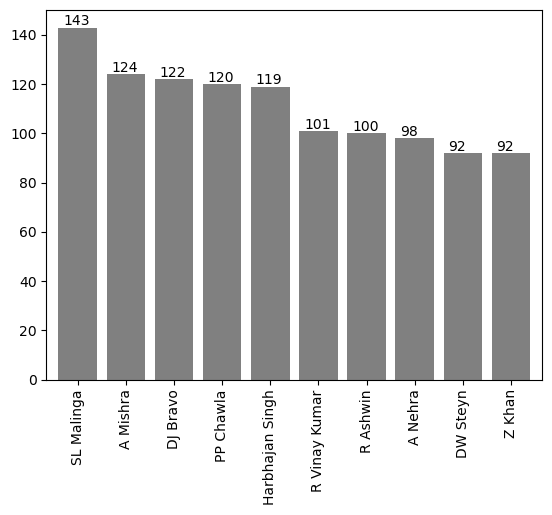

In [65]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color='Grey')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
mlt.show()

Lasith Malinga leads the chart, thanks to his unpredictable bowling action. Other bowlers have a very small wicket margin between them

Maximum Overs

Most Economical Bowlers with 300+ overs

In [68]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,R Ashwin,SL Malinga,DW Steyn,Harbhajan Singh,A Mishra,PP Ojha,Z Khan,P Kumar,PP Chawla,A Nehra
economy,6.493639,6.598504,6.615599,6.967177,7.201946,7.404321,7.505917,7.572447,7.61165,7.618893


Frequency Of Economy

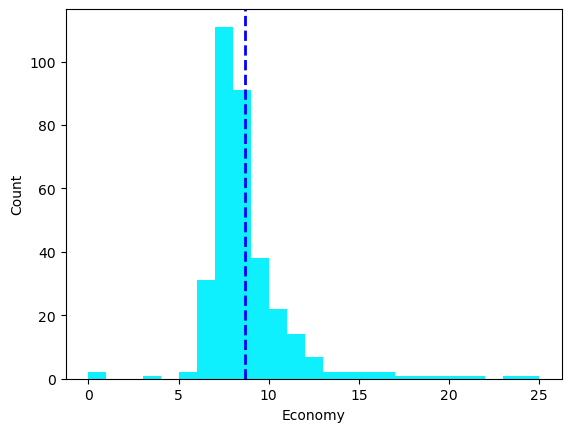

In [72]:
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='blue', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average economy rate is between 8.5-9

Extras

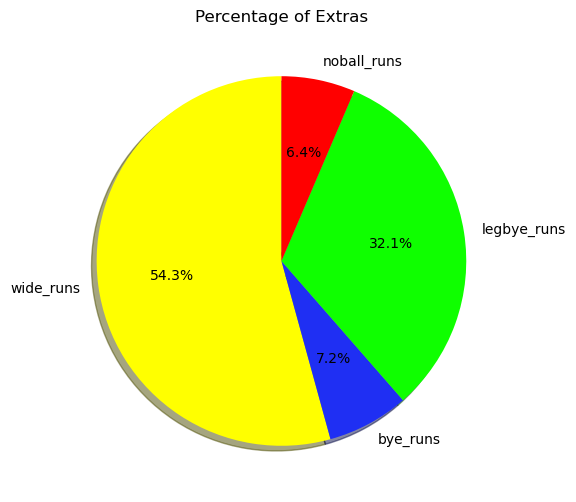

In [74]:
extras=delivery[['wide_runs','bye_runs','legbye_runs','noball_runs']].sum()
sizes=[5161,680,3056,612]
mlt.pie(sizes, labels=['wide_runs','bye_runs','legbye_runs','noball_runs'],
        colors=['Yellow', '#1f2ff3', '#0fff00', 'Red'],explode=(0,0,0,0),autopct='%1.1f%%', shadow=True, startangle=90)
mlt.title("Percentage of Extras")
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.plot()
mlt.show()

How do the wickets fall?

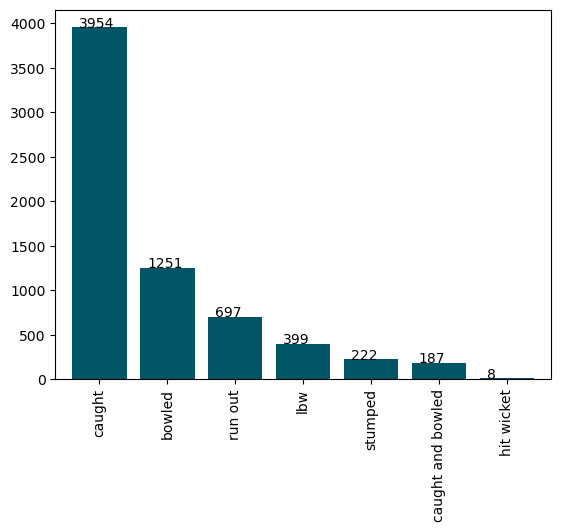

In [75]:
dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=delivery[delivery["dismissal_kind"].isin(dismiss)]
ax=ct.dismissal_kind.value_counts()[:10].plot.bar(width=0.8,color='#005566')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
mlt.show()

Teams with maximum sixes

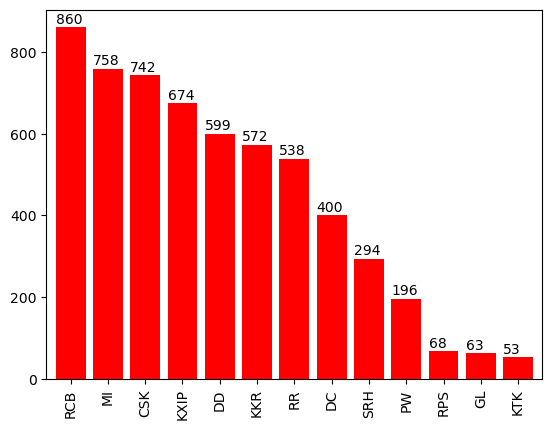

In [77]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().plot.bar(width=0.8,color='Red')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
mlt.show()

RCB-RCB everywhere. Here too RCB leads with a big margin